# **Сколько клиентов посещает сайт** #

In [ ]:
import psycopg2
import pandas as pd

In [ ]:
import psycopg2

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)


In [ ]:
cursor = connection.cursor()
cursor.execute("select * from msu_analytics.client")
result = cursor.fetchall()
client = pd.DataFrame(result)

In [ ]:
print(client)

         0          1          2             3                          4
0       16   Мальвина    Ширяева  +79644269012 2023-02-01 03:22:06.635814
1       80        Дан     Чернов  +79678859364 2022-11-23 19:27:02.644454
2       96   Вениамин      Шаров  +79633834041 2022-10-08 05:18:55.902724
3      144    Валерия   Кошелева  +79661419813 2023-01-08 17:15:49.079516
4      267      Ирина    Хохлова  +79024071127 2022-11-16 17:26:44.455402
...    ...        ...        ...           ...                        ...
4091  4070  Валентина  Дорофеева  +79535334798 2022-11-01 16:04:30.776913
4092  4086     Таисия    Брагина  +79081928229 2023-01-09 18:16:56.335184
4093     3       Рада    Брагина  +79679692717 2022-09-25 21:18:23.734588
4094    19    Гавриил     Носков  +79631292633 2022-12-24 15:35:01.842392
4095    35       Клим   Ларионов  +79086551042 2023-01-07 21:51:34.847748

[4096 rows x 5 columns]


In [ ]:
text = "SELECT date_part('year', c.visit_dttm) as YEAR, date_part('month', c.visit_dttm) as MONTH, COUNT(c.client_rk) from msu_analytics.client c \
GROUP BY date_part('year', c.visit_dttm), date_part('month', c.visit_dttm) \
ORDER BY Year, Month;"

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)
cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

In [ ]:
result

[(2022.0, 9.0, 778),
 (2022.0, 10.0, 843),
 (2022.0, 11.0, 786),
 (2022.0, 12.0, 805),
 (2023.0, 1.0, 852),
 (2023.0, 2.0, 32)]

In [ ]:
visM = pd.DataFrame(result)
visM

,0,1,2
0,2022.0,9.0,778
1,2022.0,10.0,843
2,2022.0,11.0,786
3,2022.0,12.0,805
4,2023.0,1.0,852
5,2023.0,2.0,32


In [ ]:
from datetime import datetime

visM[0] = list(map(int, list(visM[0])))
visM[1] = list(map(int, list(visM[1])))


date = visM[[0, 1]]
date.columns = ["year", "month"]
date["day"] = [1]*date.shape[0]
visM.index = pd.to_datetime(date)
visM = visM.drop(0, axis = 1).drop(1, axis = 1)
visM.columns = [["count"]]
visM

,count
2022-09-01,778
2022-10-01,843
2022-11-01,786
2022-12-01,805
2023-01-01,852
2023-02-01,32


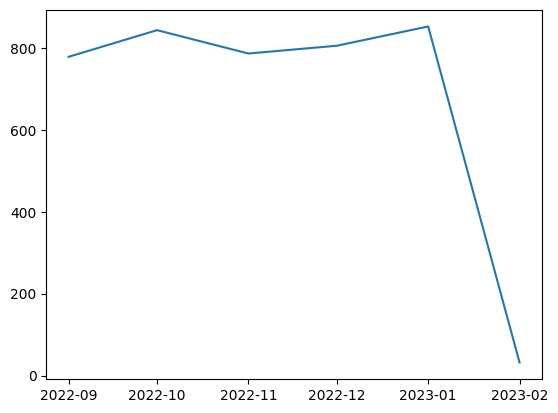

In [ ]:
from matplotlib import pyplot as plt

plt.plot(visM)

# **По неделям** #

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.client")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', c.visit_dttm) as YEAR, date_part('week', c.visit_dttm) as WEEK, COUNT(c.client_rk) from msu_analytics.client c \
GROUP BY date_part('year', c.visit_dttm), date_part('week', c.visit_dttm) \
ORDER BY Year, WEEK;"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

In [ ]:
result

[(2022.0, 35.0, 111),
 (2022.0, 36.0, 184),
 (2022.0, 37.0, 167),
 (2022.0, 38.0, 181),
 (2022.0, 39.0, 195),
 (2022.0, 40.0, 204),
 (2022.0, 41.0, 190),
 (2022.0, 42.0, 171),
 (2022.0, 43.0, 189),
 (2022.0, 44.0, 197),
 (2022.0, 45.0, 173),
 (2022.0, 46.0, 179),
 (2022.0, 47.0, 180),
 (2022.0, 48.0, 177),
 (2022.0, 49.0, 168),
 (2022.0, 50.0, 196),
 (2022.0, 51.0, 192),
 (2022.0, 52.0, 158),
 (2023.0, 1.0, 201),
 (2023.0, 2.0, 205),
 (2023.0, 3.0, 181),
 (2023.0, 4.0, 182),
 (2023.0, 5.0, 81),
 (2023.0, 52.0, 34)]

([<matplotlib.axis.XTick at 0x7ff915ace4c0>,
 [Text(0.0, 0, '2022-35'),
  Text(3.0, 0, '2022-38'),
  Text(6.0, 0, '2022-41'),
  Text(9.0, 0, '2022-44'),
  Text(12.0, 0, '2022-47'),
  Text(15.0, 0, '2022-50'),
  Text(18.0, 0, '2023-1'),
  Text(21.0, 0, '2023-4')])

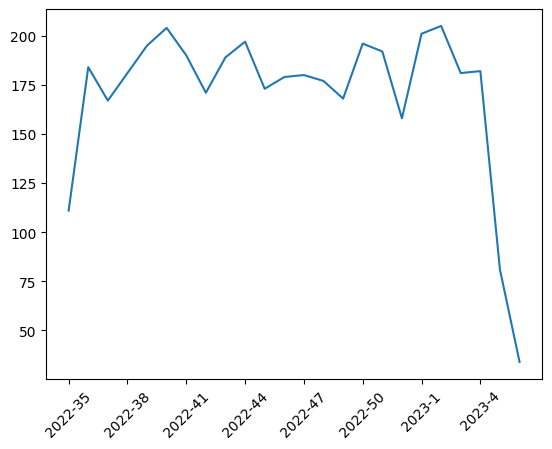

In [ ]:
visW = pd.DataFrame(result)

from datetime import datetime

visW[0] = list(map(int, list(visW[0])))
visW[1] = list(map(int, list(visW[1])))

visW[0] = list(map(str, list(visW[0])))
visW[1] = list(map(str, list(visW[1])))

visW.index = visW[0] + '-' + visW[1]

visW = visW.drop(0, axis = 1).drop(1, axis = 1)
visW.columns = [["count"]]
visW

from matplotlib import pyplot as plt

plt.plot(visW)

plt.xticks(visW.index[::3], rotation=45)

# **Регистрируется на нем** #

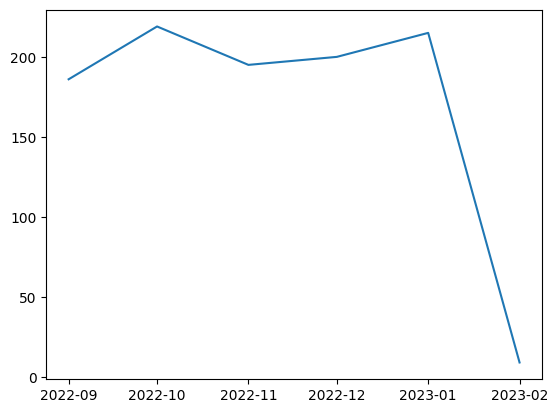

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.client")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', a.registration_dttm) as YEAR, date_part('month', a.registration_dttm) as MONTH, COUNT(a.client_rk) from msu_analytics.account a \
GROUP BY date_part('year', a.registration_dttm), date_part('month', a.registration_dttm) \
ORDER BY Year, Month"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

regM = pd.DataFrame(result)

from datetime import datetime

regM[0] = list(map(int, list(regM[0])))
regM[1] = list(map(int, list(regM[1])))


date = regM[[0, 1]]
date.columns = ["year", "month"]
date["day"] = [1]*date.shape[0]
regM.index = pd.to_datetime(date)
regM = regM.drop(0, axis = 1).drop(1, axis = 1)
regM.columns = [["count"]]

from matplotlib import pyplot as plt

plt.plot(regM)


# **Подает заявку на игру** #

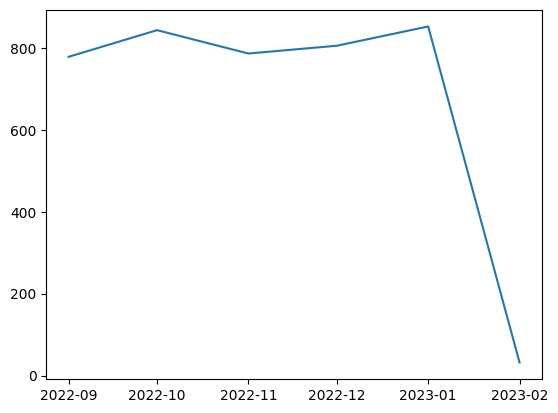

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.application")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', a.application_dttm) as YEAR, date_part('month', a.application_dttm) as MONTH, COUNT(a.account_rk) from msu_analytics.application a \
GROUP BY date_part('year', a.application_dttm), date_part('month', a.application_dttm) \
ORDER BY Year, Month"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

appM = pd.DataFrame(result)

from datetime import datetime

appM[0] = list(map(int, list(appM[0])))
appM[1] = list(map(int, list(appM[1])))


date = appM[[0, 1]]
date.columns = ["year", "month"]
date["day"] = [1]*date.shape[0]
appM.index = pd.to_datetime(date)
appM = appM.drop(0, axis = 1).drop(1, axis = 1)
appM.columns = [["count"]]

from matplotlib import pyplot as plt
plt.plot(visM)

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.client")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', a.registration_dttm) as YEAR, date_part('week', a.registration_dttm) as WEEK, COUNT(a.client_rk) from msu_analytics.account a \
GROUP BY date_part('year', a.registration_dttm), date_part('week', a.registration_dttm) \
ORDER BY Year, WEEK;"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

regW = pd.DataFrame(result)

from datetime import datetime

regW[0] = list(map(int, list(regW[0])))
regW[1] = list(map(int, list(regW[1])))

regW[0] = list(map(str, list(regW[0])))
regW[1] = list(map(str, list(regW[1])))

regW.index = regW[0] + '-' + regW[1]

regW = regW.drop(0, axis = 1).drop(1, axis = 1)
regW.columns = [["count"]]

([<matplotlib.axis.XTick at 0x7ff915b13820>,
 [Text(0.0, 0, '2022-36'),
  Text(3.0, 0, '2022-39'),
  Text(6.0, 0, '2022-42'),
  Text(9.0, 0, '2022-45'),
  Text(12.0, 0, '2022-48'),
  Text(15.0, 0, '2022-51'),
  Text(18.0, 0, '2023-2'),
  Text(21.0, 0, '2023-5')])

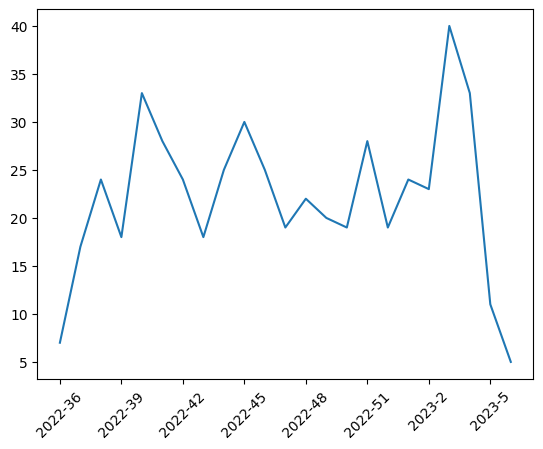

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.client")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', a.application_dttm) as YEAR, date_part('week', a.application_dttm) as WEEK, COUNT(a.account_rk) from msu_analytics.application a \
GROUP BY date_part('year', a.application_dttm), date_part('week', a.application_dttm) \
ORDER BY Year, WEEK;"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

appW = pd.DataFrame(result)

from datetime import datetime

appW[0] = list(map(int, list(appW[0])))
appW[1] = list(map(int, list(appW[1])))

appW[0] = list(map(str, list(appW[0])))
appW[1] = list(map(str, list(appW[1])))

appW.index = appW[0] + '-' + appW[1]

appW = appW.drop(0, axis = 1).drop(1, axis = 1)

appW.columns = [["count"]]
appW

from matplotlib import pyplot as plt
plt.plot(appW)

plt.xticks(appW.index[::3], rotation=45)



# **Приходит на игру** #

([<matplotlib.axis.XTick at 0x7ff9130635e0>,
 [Text(1.0, 0, '2022-36'),
  Text(4.0, 0, '2022-39'),
  Text(7.0, 0, '2022-42'),
  Text(10.0, 0, '2022-45'),
  Text(13.0, 0, '2022-48'),
  Text(16.0, 0, '2022-51'),
  Text(19.0, 0, '2023-2'),
  Text(22.0, 0, '2023-5')])

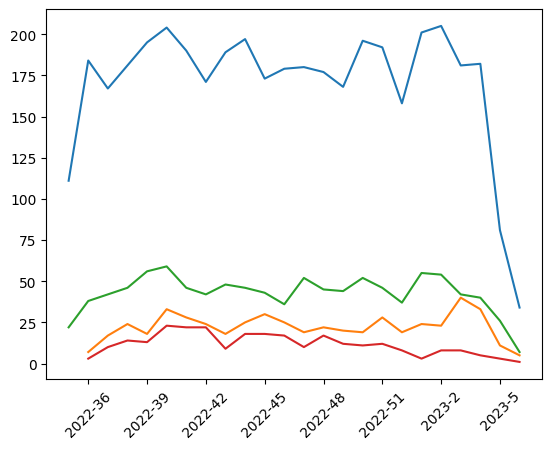

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.client")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', a.application_dttm) as YEAR, date_part('week', a.application_dttm) as WEEK, COUNT(a.account_rk) \
from (select * from msu_analytics.application a \
inner join (select * from msu_analytics.game g where g.game_flg = 1) g \
on a.game_rk = g.game_rk) a \
GROUP BY date_part('year', a.application_dttm), date_part('week', a.application_dttm) \
ORDER BY Year, WEEK;"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

gamW = pd.DataFrame(result)

from datetime import datetime

gamW[0] = list(map(int, list(gamW[0])))
gamW[1] = list(map(int, list(gamW[1])))

gamW[0] = list(map(str, list(gamW[0])))
gamW[1] = list(map(str, list(gamW[1])))

gamW.index = gamW[0] + '-' + gamW[1]

gamW = gamW.drop(0, axis = 1).drop(1, axis = 1)

gamW.columns = [["count"]]

from matplotlib import pyplot as plt
plt.plot(visW)
plt.plot(appW)
plt.plot(regW)
plt.plot(gamW)

plt.xticks(appW.index[::3], rotation=45)

        0     1   2
0  2022.0   9.0  38
1  2022.0  10.0  80
2  2022.0  11.0  69
3  2022.0  12.0  52
4  2023.0   1.0  25


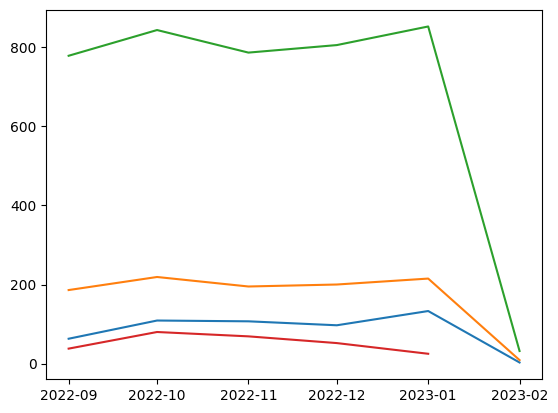

In [ ]:
connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute("select * from msu_analytics.application")
result = cursor.fetchall()
client = pd.DataFrame(result)

text = "SELECT date_part('year', a.application_dttm) as YEAR, date_part('month', a.application_dttm) as MONTH, COUNT(a.account_rk) \
from (select * from msu_analytics.application a \
inner join (select * from msu_analytics.game g where g.game_flg = 1) g \
on a.game_rk = g.game_rk) a \
GROUP BY date_part('year', a.application_dttm), date_part('month', a.application_dttm) \
ORDER BY Year, Month"

connection = psycopg2.connect(
    database='postgres',
    user='student',
    password='JvLda93aA',
    host='158.160.52.106',
    port=5432,
)

cursor = connection.cursor()
cursor.execute(text)
result = cursor.fetchall()
client = pd.DataFrame(result)

gamM = pd.DataFrame(result)
print(gamM)
from datetime import datetime

gamM[0] = list(map(int, list(gamM[0])))
gamM[1] = list(map(int, list(gamM[1])))

date = gamM[[0, 1]]
date.columns = ["year", "month"]
date["day"] = [1]*date.shape[0]
gamM.index = pd.to_datetime(date)
gamM = gamM.drop(0, axis = 1).drop(1, axis = 1)
gamM.columns = [["count"]]

from matplotlib import pyplot as plt

plt.plot(appM)
plt.plot(regM)
plt.plot(visM)
plt.plot(gamM)

# **Воронка** #

**По месяцам**

In [ ]:
import plotly.express as px
print("Введите индекс месяца:")
for i in range(len(appM)-1):
  print(appM.index[i].strftime("%Y-%m"),":", i)
i= int(input())

data = dict(values=[visM.iloc[i]["count"], regM.iloc[i]["count"], appM.iloc[i]["count"], gamM.iloc[i]["count"]],

            percentage = [
                (str(int(visM.iloc[i]["count"]/visM.iloc[i]["count"]*100)))+"%",
                 (str(int(regM.iloc[i]["count"]/visM.iloc[i]["count"]*100)))+"%",
                  (str(int(appM.iloc[i]["count"]/visM.iloc[i]["count"]*100)))+"%",
                   (str(int(gamM.iloc[i]["count"]/visM.iloc[i]["count"]*100)))+"%"],

            labels=['Посещения сайта', 'Регистрация на сайте',
                    'Подача заявок на игру', "Пришли на игру"])
fig = px.funnel(data, y='labels', x='values', text = "percentage", title=str(appM.index[i].strftime("%Y-%m")))
fig.show()

Введите индекс месяца:
2022-09 : 0
2022-10 : 1
2022-11 : 2
2022-12 : 3
2023-01 : 4
2


**По неделям**

In [ ]:
import plotly.express as px
print("Введите индекс месяца:")
for i in range(len(appW)-1):
  print(appW.index[i],":", i)
i= int(input())

data = dict(values=[visW.iloc[i]["count"], regW.iloc[i]["count"], appW.iloc[i]["count"], gamW.iloc[i]["count"]],

            percentage = [
                (str(int(visW.iloc[i]["count"]/visW.iloc[i]["count"]*100)))+"%",
                 (str(int(regW.iloc[i]["count"]/visW.iloc[i]["count"]*100)))+"%",
                  (str(int(appW.iloc[i]["count"]/visW.iloc[i]["count"]*100)))+"%",
                   (str(int(gamW.iloc[i]["count"]/visW.iloc[i]["count"]*100)))+"%"],

            labels=['Посещения сайта', 'Регистрация на сайте',
                    'Подача заявок на игру', "Пришли на игру"])
fig = px.funnel(data, y='labels', x='values', text = "percentage", title=str(appW.index[i]))
fig.show()

Введите индекс месяца:
2022-36 : 0
2022-37 : 1
2022-38 : 2
2022-39 : 3
2022-40 : 4
2022-41 : 5
2022-42 : 6
2022-43 : 7
2022-44 : 8
2022-45 : 9
2022-46 : 10
2022-47 : 11
2022-48 : 12
2022-49 : 13
2022-50 : 14
2022-51 : 15
2022-52 : 16
2023-1 : 17
2023-2 : 18
2023-3 : 19
2023-4 : 20
2023-5 : 21
8
